In [1]:
from packages.utils.database_manager import DatabaseManager
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db_manager = DatabaseManager()

df1 = db_manager.get_df("""SELECT
    replace(replace(replace(replace(bar.instituicao_financeira, 's.a', ''), 'banco', ''), 'credito, financiamento e investimento', ''), 'crédito, financiamento e investimento', '') as instituicao_financeira,
    MAX(foo.qtde_total_reclamacoes) as qtde_total_reclamacoes,
    MAX(foo.total_servicos) as total_servicos
FROM star_schema.fact_bancos_tarifas as foo
         JOIN star_schema.dim_instituicao_financeira as bar ON foo.instituicao_financeira_id = bar.instituicao_financeira_id
where
        foo.qtde_total_reclamacoes::decimal > 0
  AND bar.cnpj_if is not null
  AND total_servicos > 0
  AND bar.instituicao_financeira not ilike 'fact%%'
  AND bar.instituicao_financeira not ilike 'banco digio%%'
GROUP BY 1
ORDER BY 3 DESC
LIMIT 30""")


df2 = db_manager.get_df("""SELECT
    replace(replace(replace(replace(bar.instituicao_financeira, 's.a', ''), 'banco', ''), 'credito, financiamento e investimento', ''), 'crédito, financiamento e investimento', '') as instituicao_financeira,
    MAX(foo.total_taxas_gratuitas) as total_taxas_gratuitas
FROM star_schema.fact_bancos_tarifas as foo
         JOIN star_schema.dim_instituicao_financeira as bar ON foo.instituicao_financeira_id = bar.instituicao_financeira_id
where
        foo.qtde_total_reclamacoes::decimal > 0
  AND foo.qtde_total_reclamacoes::decimal < 1000
  AND bar.cnpj_if is not null
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10""")


df3 = db_manager.get_df("""
SELECT
    replace(bar.instituicao_financeira, '(conglomerado)', '') as instituicao_financeira,
    SUM(foo.qtde_total_reclamacoes) as qtde_total_reclamacoes
FROM star_schema.fact_bancos_tarifas as foo
         JOIN star_schema.dim_instituicao_financeira as bar ON foo.instituicao_financeira_id = bar.instituicao_financeira_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
""")

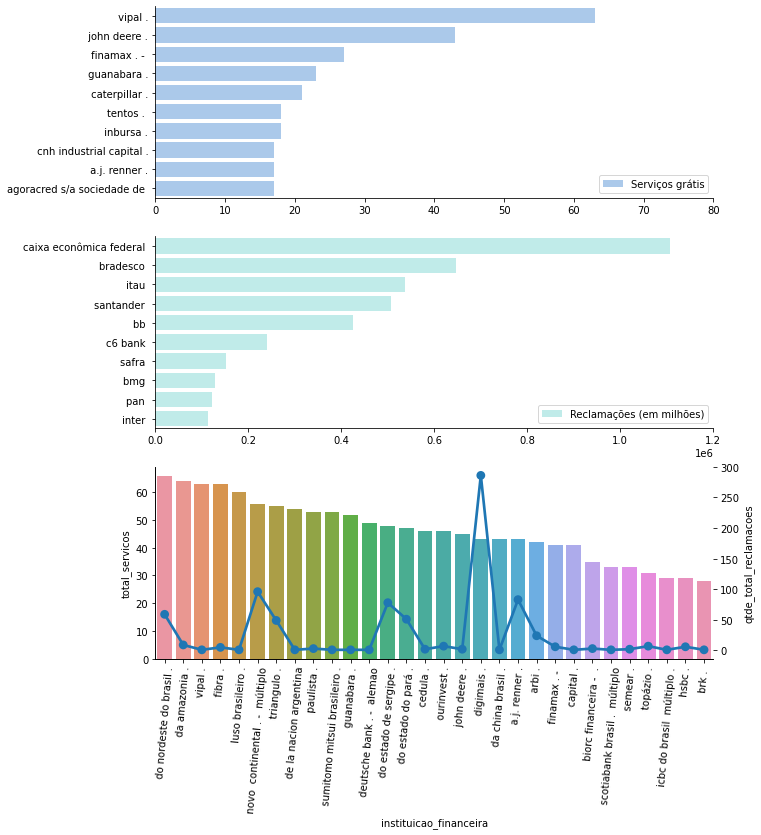

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the matplotlib figure
f, ax = plt.subplots(3,1 ,figsize=(10, 12))

sns.set_color_codes("pastel")
sns.barplot(x="total_taxas_gratuitas", y="instituicao_financeira", data=df2,
            label="Serviços grátis", color="b", ax=ax[0])

ax[0].legend(ncol=2, loc="lower right", frameon=True)
ax[0].set(xlim=(0, 80), ylabel="",
       xlabel="")

sns.barplot(x="qtde_total_reclamacoes", y="instituicao_financeira", data=df3,
            label="Reclamações (em milhões)", color="c", ax=ax[1])

ax[1].legend(ncol=2, loc="lower right", frameon=True)
ax[1].set(xlim=(0, 1200000), ylabel="",
       xlabel="")

bar = sns.barplot(data=df1, x='instituicao_financeira', y='total_servicos', ax=ax[2])
ax2 = ax[2].twinx()
line = sns.pointplot(data=df1, x='instituicao_financeira', y='qtde_total_reclamacoes', ax=ax2)
bar.set_xticklabels(bar.get_xticklabels(), rotation = 85, size = 10)

sns.despine(left=False, bottom=False)
